In [29]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

import wrangle as w
import my_model as m

np.random.seed(42)

# BLUF: Top 3 Models
* 1. With features1: LogisticRegression(C=1):   train/val accuracy = .808/.785; Recall = .55
* 2. With features2: DecisionTree(max_depth=6): train/val accuracy = .817/.787; Recall = .52
* 3. With features1: knn(n_neighbors=14):       train/val accuracy = .815/.787; Recall = .50

features1 = monthly_charges, tenure, contract_type, payment_type, paperless_billing, internet_service_type, 
            online_security, online_backup, device_protection, tech_support

features2 = monthly_charges, tenure, contract_type, payment_type, internet_service_type, tech_support

# For modeling:
* INCLUDE monthly_charges, tenure, contract_type, payment_type, paperless_billing, internet_service_type, online_security, online_backup, device_protection, tech_support
* EXCLUDE multiple_lines (and phone_service which is directly related), streaming_tv, streaming_movies, total_charges (because it's related to tenure)
* FOR NOW EXCLUDE: gender, senior_citizen, partner, dependents 

In [2]:
df = w.get_telco_data()

csv file found and read


In [3]:
df = w.prep_telco2(df)

In [4]:
df = w.prep_telco_for_model2(df)

In [5]:
target = 'churn_encoded'
train, validate, test = w.split_function(df, target)

Prepared df: (7043, 15)

Train: (4225, 15)
Validate: (1409, 15)
Test: (1409, 15)


In [6]:
X_train, X_validate, X_test, y_train, y_validate, y_test, baseline_accuracy = (
    m.get_X_y_baseline(train, validate, test, target)
    )
baseline_accuracy

0.7346745562130178

# Check some models with all columns: make/fit/use the model
1. Logistic Regression
2. knn
3. Random Forest
4. Decision Tree

## 1. Logistical Regression 
* Quick Summary up front - logit1 (C=1) is about the best with .808/.785 accuracy for train/validate

In [54]:
logit1 = LogisticRegression(C=1)

In [55]:
logit1.fit(X_train, y_train)

LogisticRegression(C=1)

In [56]:
logit1.score(X_train, y_train)

0.8087573964497041

In [57]:
y_pred = logit1.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2798          306
1_actual          502          619

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3104
           1       0.67      0.55      0.61      1121

    accuracy                           0.81      4225
   macro avg       0.76      0.73      0.74      4225
weighted avg       0.80      0.81      0.80      4225

Accuracy: 0.8087573964497041

True Positive Rate/Sensitivity/Recall/Power: 0.552185548617306
False Positive Rate/False Alarm Ratio/Fall-out: 0.09858247422680412
True Negative Rate/Specificity/Selectivity: 0.9014175257731959
False Negative Rate/Miss Rate: 0.44781445138269405

Precision/PPV: 0.6691891891891892
F1 Score: 0.6050830889540567

Support (0): 1121
Support (1): 3104


(2798, 306, 502, 619)

In [11]:
logit_results_df = m.get_multi_logit_scores(X_train, X_validate, y_train, y_validate)
logit_results_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,C,train_acc,val_acc,coef_tenure,coef_monthly_charges,coef_paperless_billing_encoded,coef_internet_service_type_Fiber optic,coef_internet_service_type_None,coef_online_security_Yes,coef_online_backup_Yes,coef_device_protection_Yes,coef_tech_support_Yes,coef_contract_type_One year,coef_contract_type_Two year,coef_payment_type_Credit card (automatic),coef_payment_type_Electronic check,coef_payment_type_Mailed check
0,0.01,0.801183,0.786373,-0.043721,0.024622,0.330319,0.17534,-0.193631,-0.260409,-0.140689,-0.11984,-0.330529,-0.289373,-0.322111,-0.073057,0.349438,-0.090815
0,0.1,0.809941,0.789212,-0.033284,0.014184,0.470614,0.405828,-0.705947,-0.40598,-0.224687,-0.105135,-0.47101,-0.685432,-1.013324,-0.025816,0.476938,-0.021109
0,1.0,0.808757,0.784954,-0.03031,0.012049,0.516711,0.471649,-0.786238,-0.406911,-0.238226,-0.066288,-0.470371,-0.804333,-1.326667,-0.038206,0.519934,0.039833
0,10.0,0.807337,0.786373,-0.029976,0.010679,0.49348,0.480453,-0.94291,-0.425693,-0.246964,-0.084157,-0.47749,-0.826431,-1.329511,-0.007159,0.503023,0.041097
0,100.0,0.807574,0.787793,-0.029846,0.010748,0.493567,0.477438,-0.934152,-0.42199,-0.246466,-0.07871,-0.472686,-0.833023,-1.357878,0.000606,0.505266,0.05669
0,1000.0,0.808757,0.787083,-0.029807,0.010787,0.508084,0.489948,-0.978048,-0.428012,-0.252995,-0.071341,-0.485024,-0.839803,-1.320743,-0.040475,0.466009,0.06952


## 2. knn 
* Quick Summary up front: setting n_neighbors to 14 when making the model has accuracy of .815/.787 for train/validate

In [58]:
knn1 = KNeighborsClassifier(n_neighbors=14)

In [59]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [60]:
knn1.score(X_train, y_train)

0.8149112426035503

In [61]:
y_pred = knn1.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2880          224
1_actual          558          563

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3104
           1       0.72      0.50      0.59      1121

    accuracy                           0.81      4225
   macro avg       0.78      0.72      0.74      4225
weighted avg       0.81      0.81      0.80      4225

Accuracy: 0.8149112426035503

True Positive Rate/Sensitivity/Recall/Power: 0.5022301516503123
False Positive Rate/False Alarm Ratio/Fall-out: 0.07216494845360824
True Negative Rate/Specificity/Selectivity: 0.9278350515463918
False Negative Rate/Miss Rate: 0.4977698483496878

Precision/PPV: 0.7153748411689962
F1 Score: 0.590146750524109

Support (0): 1121
Support (1): 3104


(2880, 224, 558, 563)

In [17]:
# results_df = m.get_knn_metrics(X_train, X_validate, y_train, y_validate)
results_df['diff'] = results_df.train_acc - results_df.val_acc
results_df

,train_acc,val_acc,diff
1,0.994793,0.736693,0.258100
2,0.875030,0.771469,0.103560
3,0.859408,0.766501,0.092907
4,0.841420,0.773598,0.067822
5,0.838343,0.754436,0.083907
6,0.831243,0.775018,0.056225
7,0.827456,0.763662,0.063793
8,0.822959,0.774308,0.048651
9,0.822249,0.772889,0.049360
10,0.818935,0.780696,0.038239


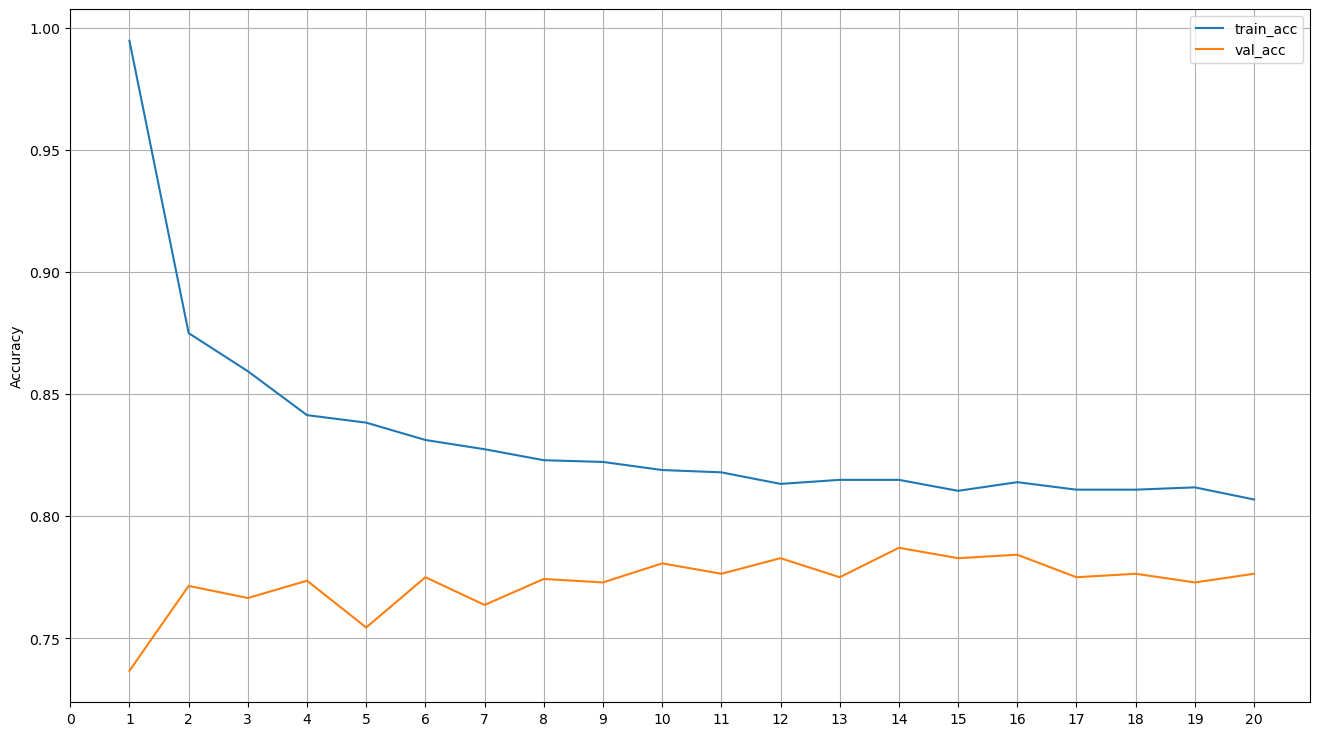

In [16]:
# plot the score
results_df[['train_acc','val_acc']].plot(figsize = (16,9))
# results_df.plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

## 3. Random Forest
* Best rf model was with min_samples_leaf = 1, max_depth = 4. Yielded an accuracy of .799/.781 on train/validate

In [62]:
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=4, random_state=42)

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [64]:
y_pred = rf.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2927          177
1_actual          668          453

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3104
           1       0.72      0.40      0.52      1121

    accuracy                           0.80      4225
   macro avg       0.77      0.67      0.70      4225
weighted avg       0.79      0.80      0.78      4225

Accuracy: 0.8

True Positive Rate/Sensitivity/Recall/Power: 0.4041034790365745
False Positive Rate/False Alarm Ratio/Fall-out: 0.05702319587628866
True Negative Rate/Specificity/Selectivity: 0.9429768041237113
False Negative Rate/Miss Rate: 0.5958965209634255

Precision/PPV: 0.719047619047619
F1 Score: 0.5174186179326099

Support (0): 1121
Support (1): 3104


(2927, 177, 668, 453)

In [23]:
y_pred = rf.predict(X_validate)
m.get_classifier_metrics(y_validate, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual          893          142
1_actual          189          185

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1035
           1       0.57      0.49      0.53       374

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

Accuracy: 0.7650816181689141

True Positive Rate/Sensitivity/Recall/Power: 0.4946524064171123
False Positive Rate/False Alarm Ratio/Fall-out: 0.13719806763285025
True Negative Rate/Specificity/Selectivity: 0.8628019323671497
False Negative Rate/Miss Rate: 0.5053475935828877

Precision/PPV: 0.5657492354740061
F1 Score: 0.5278174037089871

Support (0): 374
Support (1): 1035


(893, 142, 189, 185)

In [27]:
def get_rf_scores(X_train, X_validate, y_train, y_validate):
    """
    This function will
    - take a while to run if you have a large dataset!
    - take in X_train, X_validate, y_train, y_validate
    - make multiple RandomForest classifier models with hyperparameters that vary:
        - max_depth varies from 1 to 10
        - min_samples_leaf varies from 1 to 10
    - returns a dataframe with train/validate accuracies and their difference
    """

    # initialize random forest accuracy dataframe
    rf_acc_init = pd.Series(range(1,11))
    rf_acc_df = pd.DataFrame(rf_acc_init, columns=['min_samples_leaf'])

    for y in range(1, 11): # max_depth = 1-10
        train_acc_list = []
        val_acc_list = []
        for x in range(1, 11):  # min_samples_leaf = 1-10
            rf = RandomForestClassifier(min_samples_leaf=x, random_state=42, max_depth = y, criterion='entropy')
            rf.fit(X_train, y_train)
            train_acc = rf.score(X_train, y_train)
            val_acc = rf.score(X_validate, y_validate)
            train_acc_list.append(train_acc)
            val_acc_list.append(val_acc)
        new_col_t = 'trn_acc_depth_' + str(y)
        rf_acc_df[new_col_t] = pd.Series(train_acc_list)
        new_col_v = 'val_acc_depth_' + str(y)
        rf_acc_df[new_col_v] = pd.Series(val_acc_list)
        new_col_d = 'diff_' + str(y)
        rf_acc_df[new_col_d] = rf_acc_df[new_col_t] - rf_acc_df[new_col_v]
    
    return rf_acc_df

In [28]:
results_df = get_rf_scores(X_train, X_validate, y_train, y_validate)
results_df.T

,0,1,2,3,4,5,6,7,8,9
min_samples_leaf,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
trn_acc_depth_1,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675
val_acc_depth_1,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564
diff_1,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111
trn_acc_depth_2,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675
val_acc_depth_2,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564
diff_2,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111
trn_acc_depth_3,0.782012,0.782012,0.782012,0.782012,0.782012,0.782012,0.782012,0.782012,0.782012,0.782012
val_acc_depth_3,0.776437,0.776437,0.776437,0.776437,0.776437,0.776437,0.776437,0.776437,0.776437,0.776437
diff_3,0.005575,0.005575,0.005575,0.005575,0.005575,0.005575,0.005575,0.005575,0.005575,0.005575


## 4. Decision Tree
* Best DecisionTree model was with max_depth = 2 or 3; yielded an accuracy of .792/.780 on train/validate

In [51]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [52]:
tree.score(X_train, y_train)

0.7924260355029585

In [53]:
y_pred = tree.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2898          206
1_actual          671          450

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3104
           1       0.69      0.40      0.51      1121

    accuracy                           0.79      4225
   macro avg       0.75      0.67      0.69      4225
weighted avg       0.78      0.79      0.77      4225

Accuracy: 0.7924260355029585

True Positive Rate/Sensitivity/Recall/Power: 0.40142729705619984
False Positive Rate/False Alarm Ratio/Fall-out: 0.0663659793814433
True Negative Rate/Specificity/Selectivity: 0.9336340206185567
False Negative Rate/Miss Rate: 0.5985727029438002

Precision/PPV: 0.6859756097560976
F1 Score: 0.5064715813168261

Support (0): 1121
Support (1): 3104


(2898, 206, 671, 450)

In [49]:
# make a function to look at several trees with varying hyperparameters

def get_dtree_scores(X_train, X_validate, y_train, y_validate, crit='gini', max_d=10):
    """
    This function will
    - take in X_train, X_validate, y_train, y_validate (dataframes for modeling)
    - take in crit (criterion) with the default value 'gini'
        - other valid options are 'entropy' and 'log_loss'
    - take in max_d (max_depth) with default value of 10
        - this will set the number of trees to create with each having max_depth 1 to max_d
    - make 10 DecisionTree classifier models with max_depth from 1 to 10
    - return train and validate accuracies for each tree in a dataframe
    """
    #initialize results
    results=[]

    for x in range(1, max_d+1):
        tree = DecisionTreeClassifier(max_depth=x, criterion=crit)
        tree.fit(X_train, y_train)
        
        train_acc = tree.score(X_train, y_train)
        val_acc = tree.score(X_validate, y_validate)
        results.append([x, train_acc, val_acc])
            
    results_df = pd.DataFrame(results, index=(range(1,max_d+1)), columns=['max_depth','train_acc','val_acc'])
    results_df['difference'] = results_df.train_acc - results_df.val_acc
    return results_df  

In [50]:
results_df = get_dtree_scores(X_train, X_validate, y_train, y_validate)
results_df

,max_depth,train_acc,val_acc,difference
1,1,0.734675,0.734564,0.000111
2,2,0.792426,0.779986,0.012440
3,3,0.792426,0.779986,0.012440
4,4,0.799290,0.777147,0.022143
5,5,0.815621,0.775727,0.039894
6,6,0.823432,0.777857,0.045575
7,7,0.836923,0.775727,0.061196
8,8,0.848521,0.767921,0.080600
9,9,0.866982,0.762952,0.104030
10,10,0.884260,0.758694,0.125566


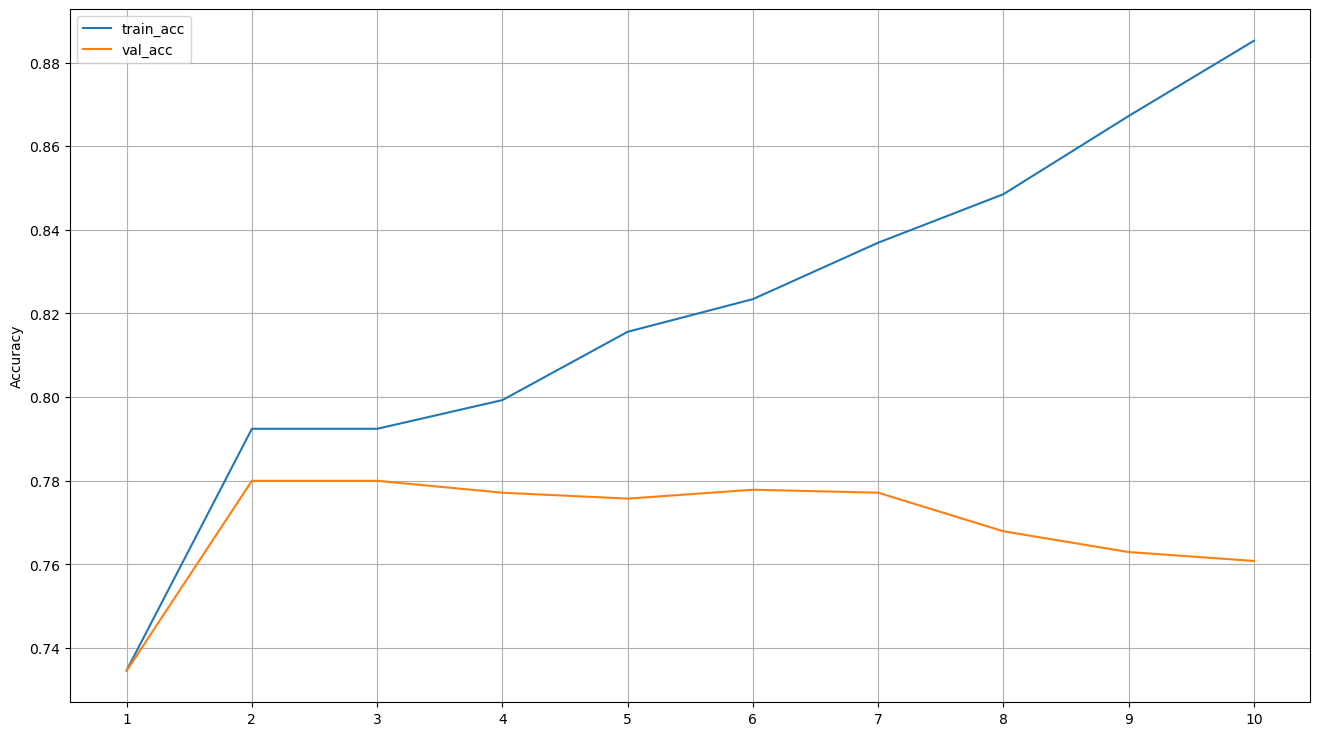

In [48]:
# plot the scoress
results_df[['train_acc','val_acc']].plot(figsize = (16,9))
# results_df.plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,11,1))
plt.grid()

# For modeling - subset of previous features:
* This time, INCLUDE monthly_charges, tenure, contract_type, payment_type, internet_service_type, tech_support
* EXCLUDE paperless_billing, online_security, online_backup, device_protection, AS WELL AS multiple_lines (and phone_service which is directly related), streaming_tv, streaming_movies, total_charges (because it's related to tenure)
* Continue to EXCLUDE: gender, senior_citizen, partner, dependents 

In [69]:
features = ['tenure', 'monthly_charges', 'internet_service_type_Fiber optic', 'internet_service_type_None',
            'tech_support_Yes', 'contract_type_One year', 'contract_type_Two year', 
            'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']
X_train = X_train[features] 
X_validate = X_validate[features]
X_test = X_test[features]


In [70]:
X_train.head().T

,2332,5275,6429,89,6412
tenure,12.00,1.0,59.00,27.00,54.0
monthly_charges,94.55,49.8,54.15,86.45,111.1
internet_service_type_Fiber optic,1.00,0.0,0.00,1.00,1.0
internet_service_type_None,0.00,0.0,0.00,0.00,0.0
tech_support_Yes,0.00,0.0,0.00,0.00,1.0
contract_type_One year,0.00,0.0,0.00,0.00,0.0
contract_type_Two year,0.00,0.0,1.00,0.00,0.0
payment_type_Credit card (automatic),0.00,1.0,1.00,0.00,0.0
payment_type_Electronic check,1.00,0.0,0.00,0.00,1.0
payment_type_Mailed check,0.00,0.0,0.00,0.00,0.0


## 1. Logistic Regression
* Summary up front; C=1 still about the best with .804/.788 on train/validate with recall .54

In [71]:
logit_results_df = m.get_multi_logit_scores(X_train, X_validate, y_train, y_validate)
logit_results_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,C,train_acc,val_acc,coef_tenure,coef_monthly_charges,coef_internet_service_type_Fiber optic,coef_internet_service_type_None,coef_tech_support_Yes,coef_contract_type_One year,coef_contract_type_Two year,coef_payment_type_Credit card (automatic),coef_payment_type_Electronic check,coef_payment_type_Mailed check
0,0.01,0.79716,0.792761,-0.046122,0.02358,0.242076,-0.191316,-0.357019,-0.312022,-0.348303,-0.071241,0.377286,-0.10935
0,0.1,0.798817,0.787793,-0.035918,0.011517,0.605272,-0.659453,-0.506692,-0.720071,-1.066057,-0.015625,0.525554,-0.048886
0,1.0,0.803787,0.787793,-0.032663,0.007755,0.723609,-0.850938,-0.494646,-0.863882,-1.40728,0.028534,0.569211,0.019753
0,10.0,0.80213,0.787083,-0.032242,0.007736,0.7318,-0.851663,-0.48168,-0.889556,-1.475512,0.022091,0.570559,0.034422
0,100.0,0.804024,0.787083,-0.032106,0.007224,0.742238,-0.881778,-0.487658,-0.888644,-1.46918,0.038707,0.575347,0.033438
0,1000.0,0.801657,0.786373,-0.031998,0.007663,0.737925,-0.852451,-0.478293,-0.894337,-1.503143,0.02731,0.567368,0.045085


In [73]:
logit = LogisticRegression(C=.01)
logit.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [75]:
y_pred = logit.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2833          271
1_actual          586          535

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3104
           1       0.66      0.48      0.56      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.69      0.71      4225
weighted avg       0.78      0.80      0.79      4225

Accuracy: 0.7971597633136095

True Positive Rate/Sensitivity/Recall/Power: 0.47725245316681536
False Positive Rate/False Alarm Ratio/Fall-out: 0.08730670103092783
True Negative Rate/Specificity/Selectivity: 0.9126932989690721
False Negative Rate/Miss Rate: 0.5227475468331847

Precision/PPV: 0.6637717121588089
F1 Score: 0.5552672548002076

Support (0): 1121
Support (1): 3104


(2833, 271, 586, 535)

In [76]:
logit = LogisticRegression(C=1)
logit.fit(X_train, y_train)

LogisticRegression(C=1)

In [77]:
y_pred = logit.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2786          318
1_actual          511          610

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3104
           1       0.66      0.54      0.60      1121

    accuracy                           0.80      4225
   macro avg       0.75      0.72      0.73      4225
weighted avg       0.80      0.80      0.80      4225

Accuracy: 0.8037869822485207

True Positive Rate/Sensitivity/Recall/Power: 0.544157002676182
False Positive Rate/False Alarm Ratio/Fall-out: 0.10244845360824742
True Negative Rate/Specificity/Selectivity: 0.8975515463917526
False Negative Rate/Miss Rate: 0.455842997323818

Precision/PPV: 0.6573275862068966
F1 Score: 0.5954123962908736

Support (0): 1121
Support (1): 3104


(2786, 318, 511, 610)

## 2. knn
* Summary up front: n_neighbors = 14 still about the best: .811/.788 train/validate with recall .49

In [78]:
results_df = m.get_knn_metrics(X_train, X_validate, y_train, y_validate)
results_df['diff'] = results_df.train_acc - results_df.val_acc
results_df

,train_acc,val_acc,diff
1,0.990769,0.746629,0.244140
2,0.869112,0.768630,0.100482
3,0.858225,0.768630,0.089595
4,0.840000,0.772179,0.067821
5,0.836686,0.760823,0.075863
6,0.830769,0.770759,0.060010
7,0.826509,0.767921,0.058588
8,0.821775,0.777857,0.043919
9,0.822722,0.775018,0.047704
10,0.817988,0.775018,0.042970


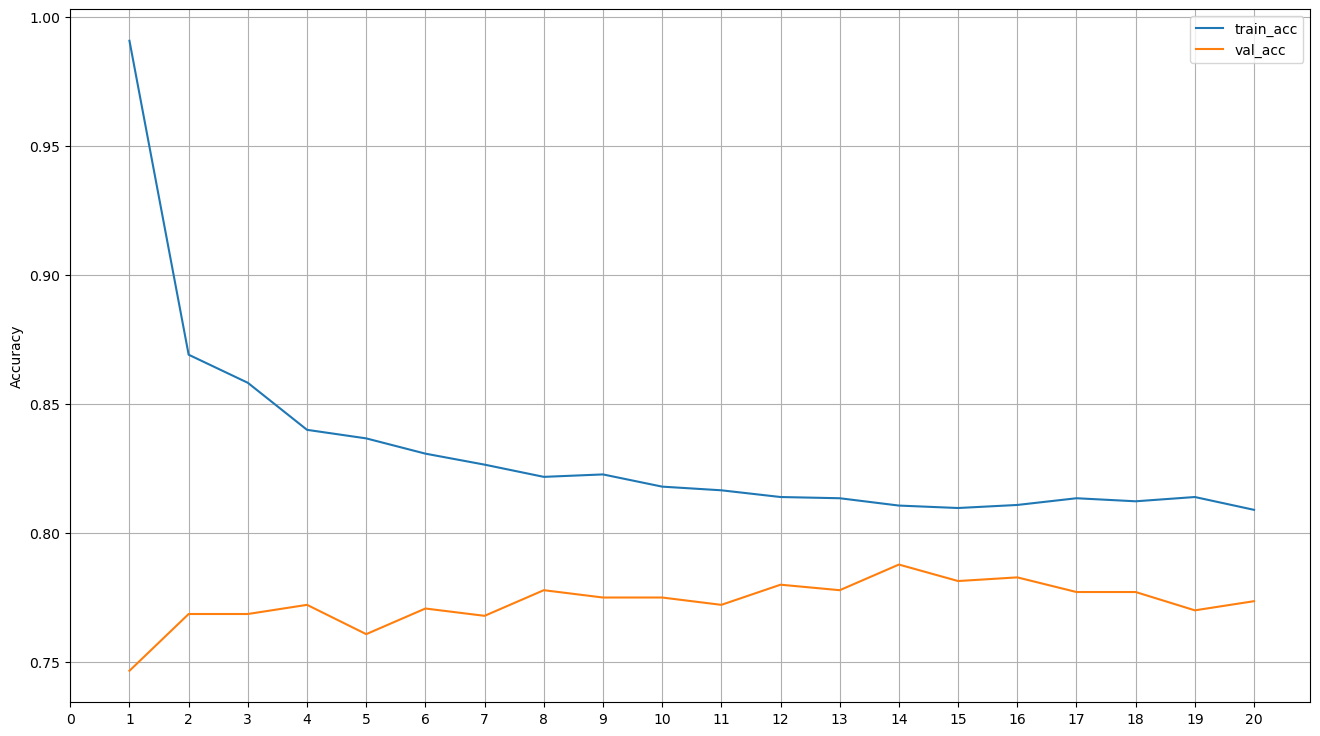

In [79]:
# plot the score
results_df[['train_acc','val_acc']].plot(figsize = (16,9))
# results_df.plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [80]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [84]:
y_pred = knn.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2881          223
1_actual          577          544

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3104
           1       0.71      0.49      0.58      1121

    accuracy                           0.81      4225
   macro avg       0.77      0.71      0.73      4225
weighted avg       0.80      0.81      0.80      4225

Accuracy: 0.8106508875739645

True Positive Rate/Sensitivity/Recall/Power: 0.4852809991079393
False Positive Rate/False Alarm Ratio/Fall-out: 0.07184278350515463
True Negative Rate/Specificity/Selectivity: 0.9281572164948454
False Negative Rate/Miss Rate: 0.5147190008920607

Precision/PPV: 0.7092568448500652
F1 Score: 0.5762711864406779

Support (0): 1121
Support (1): 3104


(2881, 223, 577, 544)

## 3. Random Forest
* Summary up front: min_samples_leaf=1 & max_depth=3 was best: .790/.781 on train/val with .35 recall

In [85]:
results_df = get_rf_scores(X_train, X_validate, y_train, y_validate)
results_df.T

,0,1,2,3,4,5,6,7,8,9
min_samples_leaf,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
trn_acc_depth_1,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675,0.734675
val_acc_depth_1,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564,0.734564
diff_1,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111,0.000111
trn_acc_depth_2,0.775621,0.775621,0.775621,0.775621,0.775621,0.775621,0.775621,0.775621,0.775621,0.775621
val_acc_depth_2,0.771469,0.771469,0.771469,0.771469,0.771469,0.771469,0.771469,0.771469,0.771469,0.771469
diff_2,0.004152,0.004152,0.004152,0.004152,0.004152,0.004152,0.004152,0.004152,0.004152,0.004152
trn_acc_depth_3,0.790059,0.790059,0.790059,0.790059,0.790059,0.790059,0.790059,0.790059,0.789586,0.790296
val_acc_depth_3,0.781405,0.781405,0.781405,0.781405,0.781405,0.781405,0.781405,0.781405,0.782115,0.781405
diff_3,0.008654,0.008654,0.008654,0.008654,0.008654,0.008654,0.008654,0.008654,0.007471,0.008891


In [86]:
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [87]:
y_pred = rf.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2949          155
1_actual          729          392

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3104
           1       0.72      0.35      0.47      1121

    accuracy                           0.79      4225
   macro avg       0.76      0.65      0.67      4225
weighted avg       0.78      0.79      0.76      4225

Accuracy: 0.7907692307692308

True Positive Rate/Sensitivity/Recall/Power: 0.3496877787689563
False Positive Rate/False Alarm Ratio/Fall-out: 0.04993556701030928
True Negative Rate/Specificity/Selectivity: 0.9500644329896907
False Negative Rate/Miss Rate: 0.6503122212310437

Precision/PPV: 0.716636197440585
F1 Score: 0.47002398081534774

Support (0): 1121
Support (1): 3104


(2949, 155, 729, 392)

## 4. Decision Tree
* Summary up front: max_depth=6 was best: .817/.787 on train/val with .52 recall

In [88]:
results_df = get_dtree_scores(X_train, X_validate, y_train, y_validate)
results_df

,max_depth,train_acc,val_acc,difference
1,1,0.734675,0.734564,0.000111
2,2,0.792426,0.779986,0.012440
3,3,0.792426,0.779986,0.012440
4,4,0.801657,0.775018,0.026639
5,5,0.811361,0.777857,0.033504
6,6,0.817041,0.787083,0.029958
7,7,0.825089,0.787793,0.037296
8,8,0.837160,0.767921,0.069239
9,9,0.857515,0.763662,0.093853
10,10,0.875266,0.761533,0.113733


In [89]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [90]:
y_pred = tree.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2866          238
1_actual          535          586

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3104
           1       0.71      0.52      0.60      1121

    accuracy                           0.82      4225
   macro avg       0.78      0.72      0.74      4225
weighted avg       0.81      0.82      0.81      4225

Accuracy: 0.8170414201183432

True Positive Rate/Sensitivity/Recall/Power: 0.5227475468331847
False Positive Rate/False Alarm Ratio/Fall-out: 0.07667525773195877
True Negative Rate/Specificity/Selectivity: 0.9233247422680413
False Negative Rate/Miss Rate: 0.47725245316681536

Precision/PPV: 0.7111650485436893
F1 Score: 0.6025706940874036

Support (0): 1121
Support (1): 3104


(2866, 238, 535, 586)